# 220968280 - Anirudh Swaminathan - DSE A2

## Week 3 - Exercise 5 - forestfires dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
df = pd.DataFrame()
df = pd.read_csv("C://Users//s_ani//Documents//textbooks//4thSem//ML_LAB//Week3//datasets//forestfires.csv")
df.head()


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [3]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

### 1. Linear regression on forestfires dataset

In [4]:
X = train['temp']
Y = train['area']

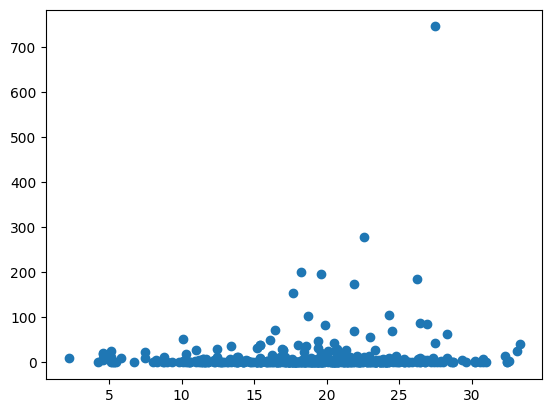

In [5]:
plt.scatter(X, Y)

In [6]:
X = np.array(X).reshape((-1,1))
Y = np.array(Y).reshape((-1,1))
reg = LinearRegression().fit(X, Y)

In [7]:
print(f'{reg.intercept_} + {reg.coef_} * x')

[-3.83956841] + [[0.79269163]] * x


In [8]:
x = np.linspace(0, 40, 100)
y = reg.intercept_ + reg.coef_*x
y = y.reshape(100,1)

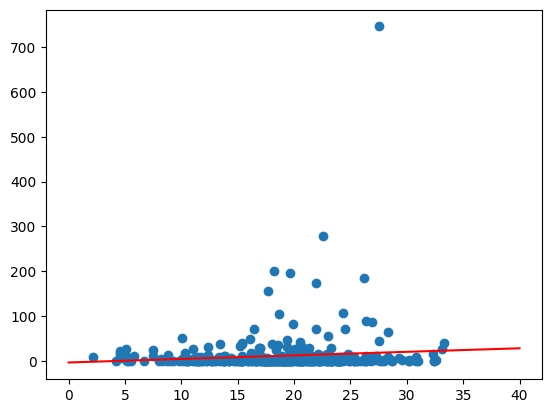

In [9]:
plt.scatter(X, Y)
plt.plot(x, y, c='red')

In [10]:
xi = int(input("Enter an integer: "))
y_pred = reg.predict([[xi]])
print(f'the predicted value is:{y_pred}')

the predicted value is:[[27.8680966]]


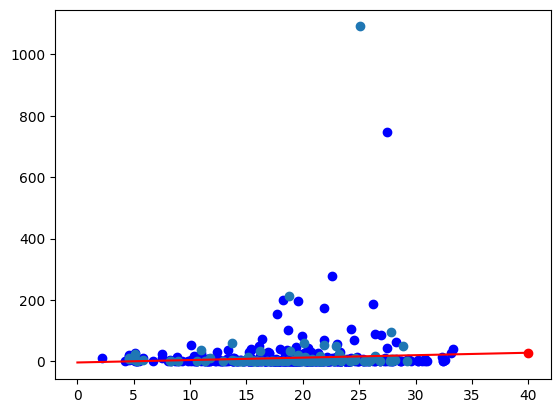

In [11]:
plt.scatter(xi,y_pred,c='red')
plt.plot(x, y, c='red')
plt.scatter(X, Y, c='blue')
plt.scatter(test['temp'], test['area'])

In [12]:
predictions = reg.predict(np.array(test['temp']).reshape((-1,1)))
mse = mean_squared_error(test['area'], predictions)
print(f'mse = {mse}')

mse = 11764.535064112944


### 2. Multiple linear regression on forestfires dataset

In [13]:
X = train.drop('area', axis=1)
X = X.drop(['month','day'], axis=1)
Y = train['area']
Y = pd.DataFrame(Y)

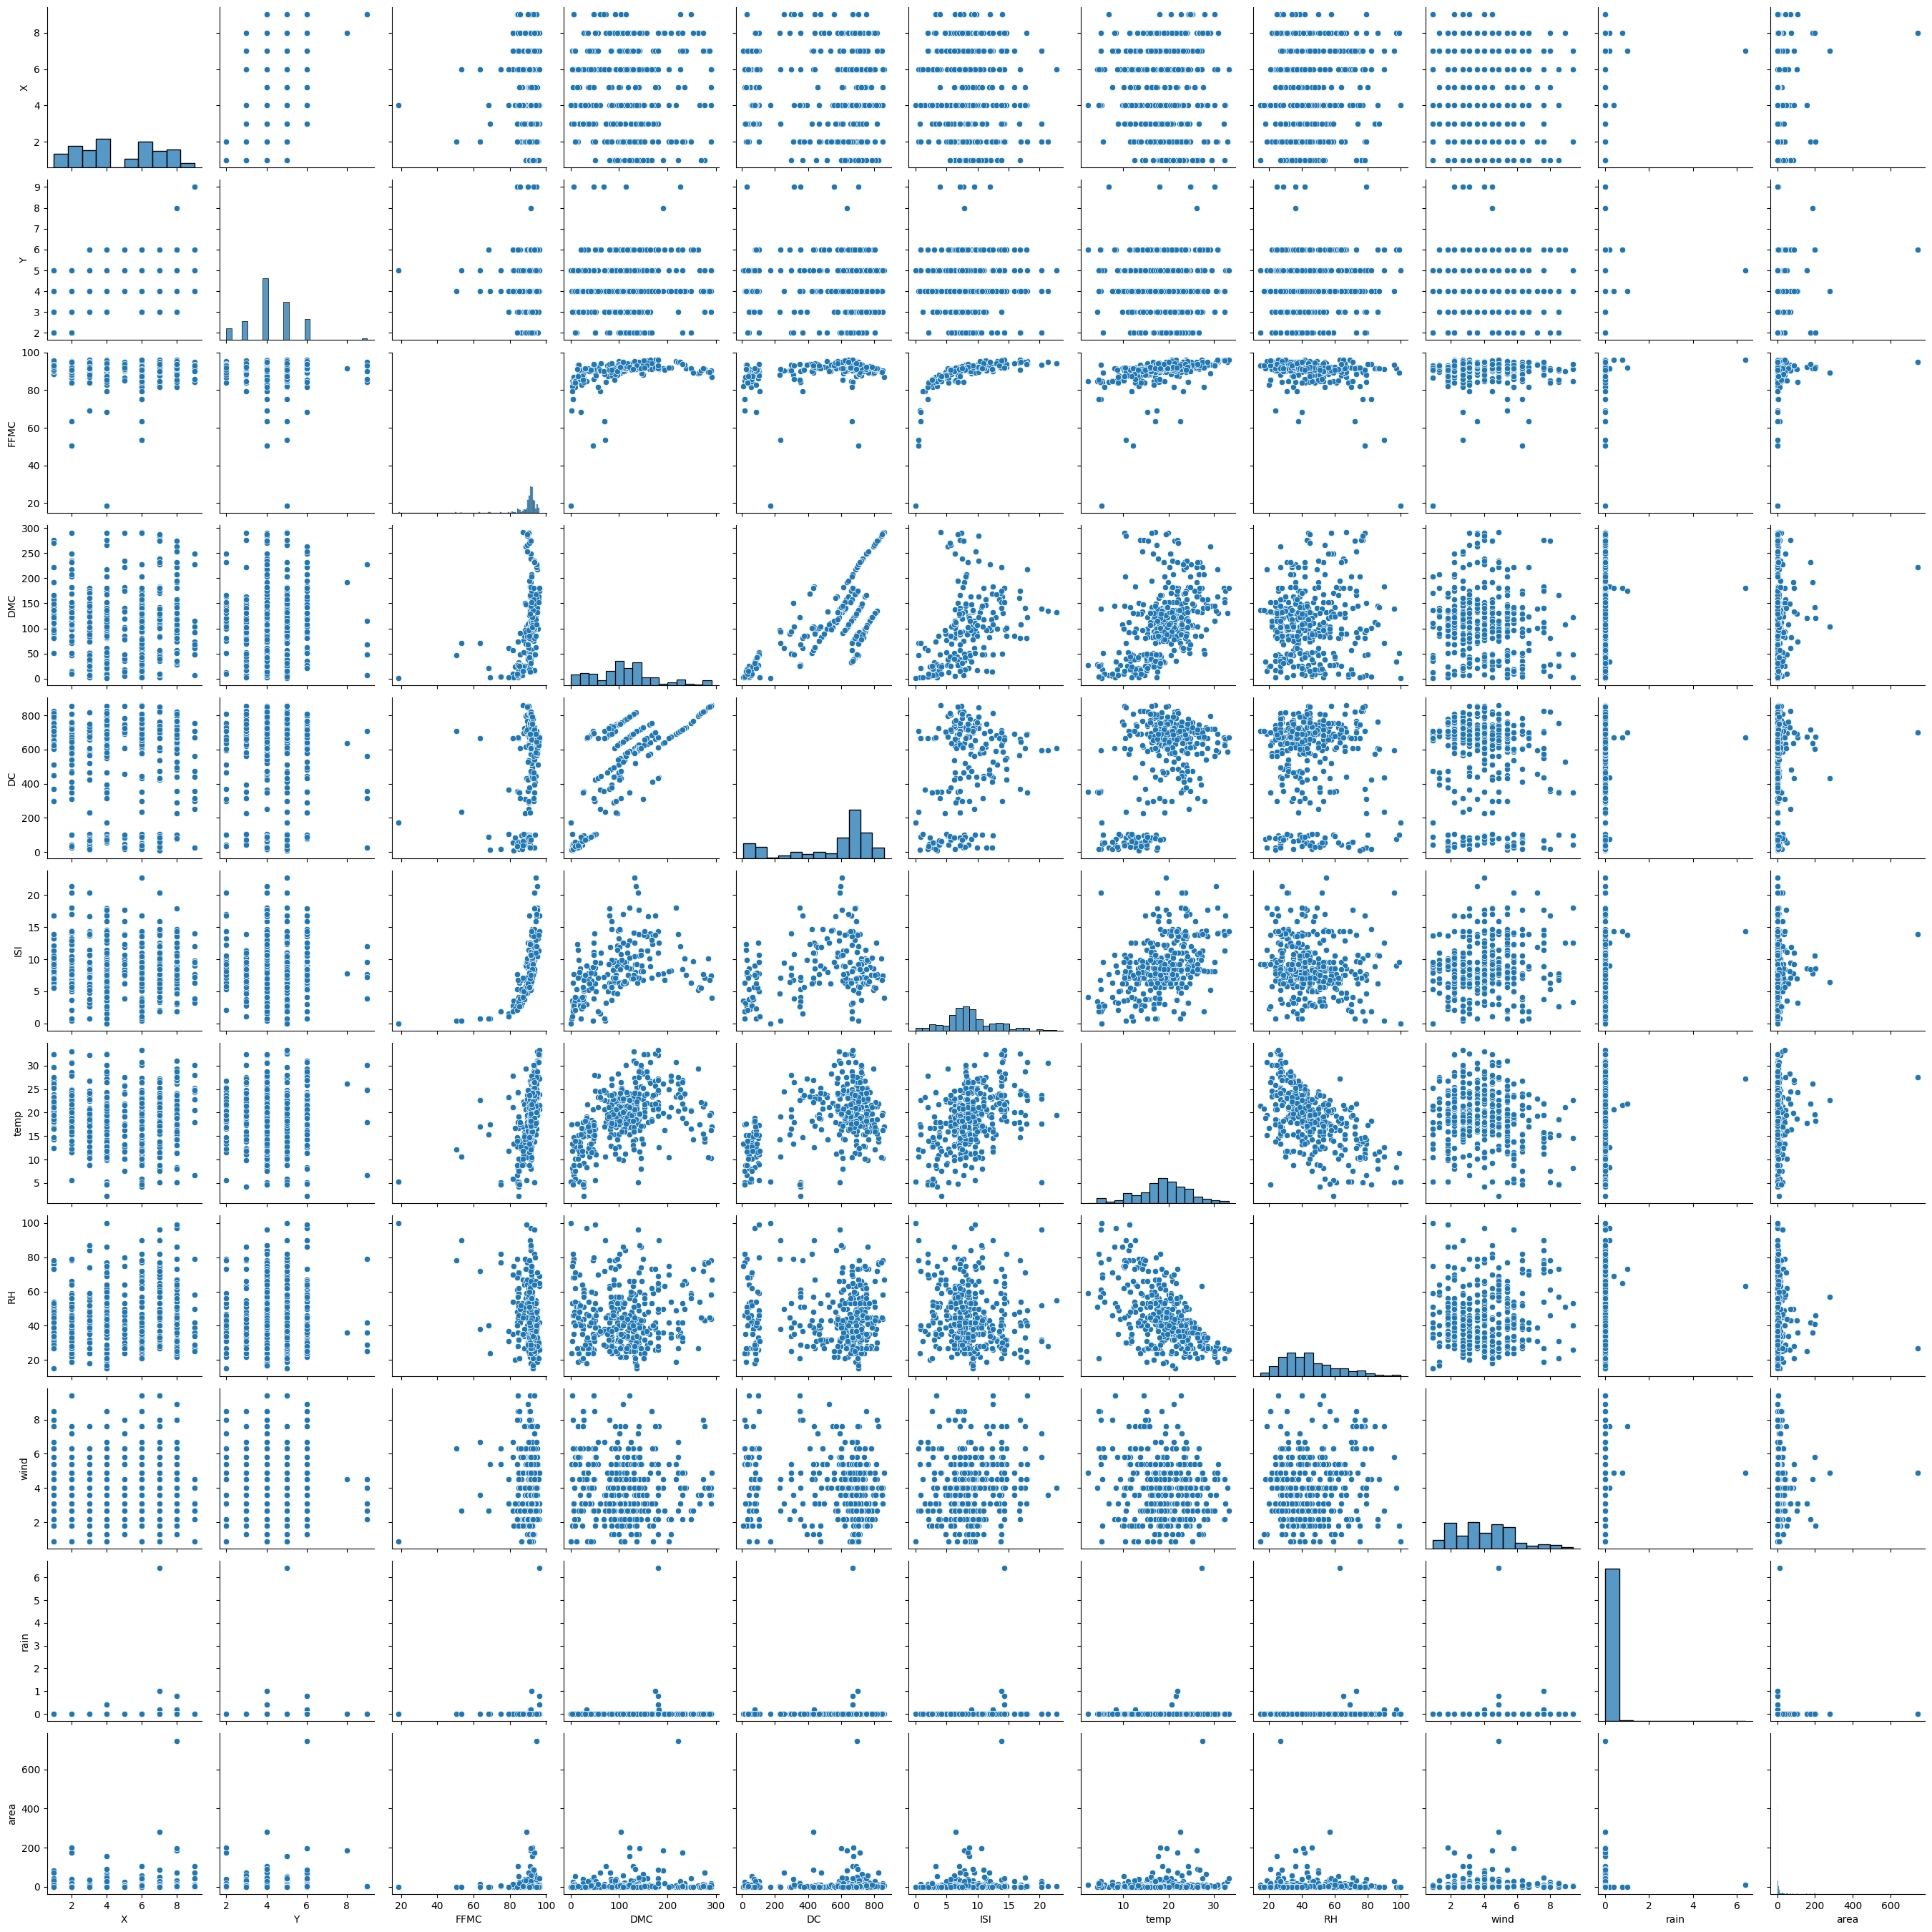

In [14]:
sns.pairplot(train)

In [15]:
reg = LinearRegression().fit(X, Y)

In [16]:
print(f'{reg.intercept_[0]} + {reg.coef_[0][0]}*X1 + {reg.coef_[0][1]}*X2')

3.3868329656812115 + 2.142428864540439*X1 + 0.06043324235982851*X2


In [18]:
X

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
329,4,3,92.2,102.3,751.5,8.4,23.5,27,4.0,0.0
173,4,4,90.9,126.5,686.5,7.0,17.7,39,2.2,0.0
272,2,5,92.1,152.6,658.2,14.3,20.2,47,4.0,0.0
497,3,4,96.1,181.1,671.2,14.3,32.3,27,2.2,0.0
182,5,4,86.8,15.6,48.3,3.9,12.4,53,2.2,0.0
...,...,...,...,...,...,...,...,...,...,...
71,4,5,94.3,85.1,692.3,15.9,17.7,37,3.6,0.0
106,4,5,91.4,30.7,74.3,7.5,18.2,29,3.1,0.0
270,2,2,92.1,152.6,658.2,14.3,21.8,56,3.1,0.0
435,2,5,90.8,84.7,376.6,5.6,23.8,51,1.8,0.0


In [19]:
x1i = float(input('enter x1:'))
x2i = float(input('enter x2:'))
x3i = float(input('enter x3:'))
x4i = float(input('enter x4:'))
x5i = float(input('enter x5:'))
x6i = float(input('enter x6:'))
x7i = float(input('enter x7:'))
x8i = float(input('enter x8:'))
x9i = float(input('enter x9:'))
x10i = float(input('enter x10:'))
x = np.array([[x1i, x2i, x3i, x4i, x5i, x6i, x7i, x8i, x9i, x10i]])
y_pred = reg.predict(x)
print(f'predicted value:{y_pred}')

predicted value:[[8.33745786]]


c:\Users\s_ani\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [20]:
test_x = test.drop(['area','month','day'], axis=1)
test_x = pd.DataFrame(test_x)
predictions = reg.predict((test_x))
mse = mean_squared_error(test['area'], predictions)
print(f'mse = {mse}')

mse = 11759.94260952891
